In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv('D:\Projects\SalaryInfoStateAuthorities\Salary_Information_for_State_Authorities.csv')

C:\Users\gupta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Authority Name,Fiscal Year End Date,Has Employees,Last Name,Middle Initial,First Name,Title,Group,Department,Pay Type,Exempt Indicator,Base Annualized Salary,Actual Salary Paid,Overtime Paid,Performance Bonus,Extra Pay,Other Compensation,Total Compensation,Paid By Another Entity,Paid by State or Local Government
0,Agriculture and New York State Horse Breeding ...,12/31/2018,NaN,Bennett,NaN,Dawn,Office Manager,Administrative and Clerical,NaN,FT,Y,"56,000.00","56,000.00",0.00,0.00,0.00,0.00,"56,000.00",N,NaN
1,Agriculture and New York State Horse Breeding ...,12/31/2018,NaN,Richardson,L,Connie,Executive Assistant,Administrative and Clerical,NaN,FT,Y,"45,840.00","45,840.00",0.00,0.00,0.00,0.00,"45,840.00",N,NaN
2,Agriculture and New York State Horse Breeding ...,12/31/2018,NaN,Young,NaN,M. Kelly,Executive Director,Executive,NaN,FT,Y,"115,000.00","115,000.00",0.00,0.00,0.00,0.00,"115,000.00",N,NaN
3,Albany Convention Center Authority,12/31/2018,NaN,Sorrentino,NaN,Al,Project Manager,Managerial,NaN,FT,Y,"40,305.33","40,305.33",0.00,0.00,0.00,0.00,"40,305.33",N,NaN
4,Albany Convention Center Authority,12/31/2018,NaN,Stewart,NaN,Duncan,Executive Director,Managerial,NaN,FT,Y,"118,890.00","118,890.00",0.00,0.00,0.00,0.00,"118,890.00",N,NaN


In [4]:
data['Employee Name'] = data['First Name']+' '+data['Last Name'] 

In [5]:
data = data.drop(columns=['Has Employees','Middle Initial','Paid by State or Local Government','First Name','Last Name'])

In [6]:
data['Base Annualized Salary'] = data['Base Annualized Salary'].replace({',':''},regex = True).astype(float)

In [7]:
data['Base Annualized Salary'].head()

0     56000.00
1     45840.00
2    115000.00
3     40305.33
4    118890.00
Name: Base Annualized Salary, dtype: float64

Text(0, 0.5, 'Average Salary')

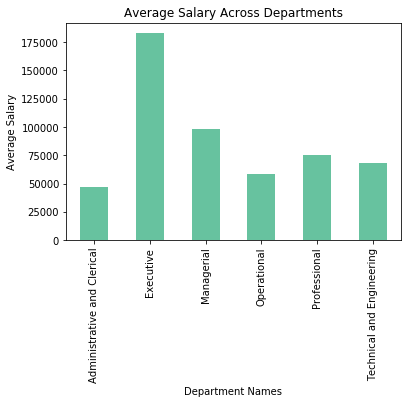

In [8]:
%matplotlib inline
round(data['Base Annualized Salary'].groupby(data['Group']).mean(),2).plot(kind='bar',color='#67c29f')
plt.title('Average Salary Across Departments')
plt.xlabel('Department Names')
plt.ylabel('Average Salary')

In [9]:
data['Fiscal Year End Date'] = pd.to_datetime(data['Fiscal Year End Date'])

In [10]:
data['Fiscal Year'] = data['Fiscal Year End Date'].dt.year

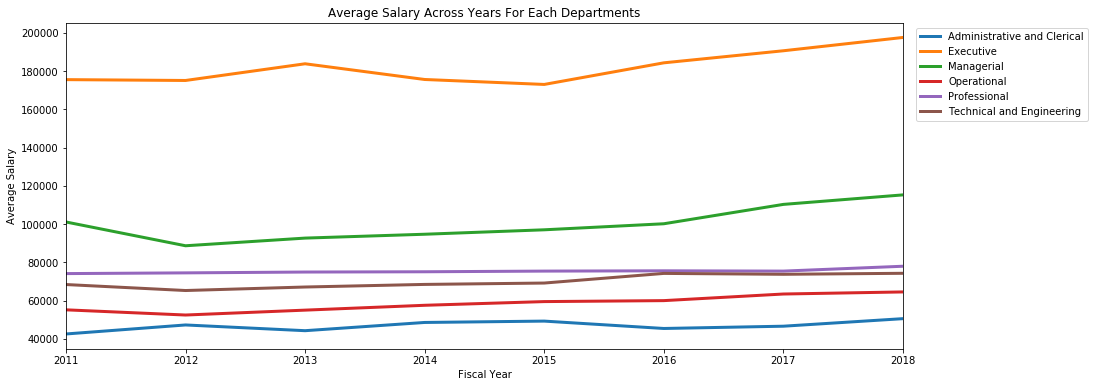

In [11]:
df_grouped = data.groupby(['Group'])
for key, group in df_grouped:
    group.groupby('Fiscal Year')['Base Annualized Salary'].mean().plot(label=key, figsize = [15,6], linewidth=3)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.title('Average Salary Across Years For Each Departments')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Average Salary')

In [12]:
df_model = pd.DataFrame(data[data['Fiscal Year']==2018][['Authority Name','Title','Group','Base Annualized Salary']])

In [13]:
df_model.head()

,Authority Name,Title,Group,Base Annualized Salary
0,Agriculture and New York State Horse Breeding ...,Office Manager,Administrative and Clerical,56000.00
1,Agriculture and New York State Horse Breeding ...,Executive Assistant,Administrative and Clerical,45840.00
2,Agriculture and New York State Horse Breeding ...,Executive Director,Executive,115000.00
3,Albany Convention Center Authority,Project Manager,Managerial,40305.33
4,Albany Convention Center Authority,Executive Director,Managerial,118890.00


In [14]:
df_model['Authority Code'] = data['Authority Name'].astype('category')
df_model['Authority Code'] = df_model['Authority Code'].cat.codes

df_model['Title Code'] = data['Title'].astype('category')
df_model['Title Code'] = df_model['Title Code'].cat.codes

df_model['Group Code'] = data['Group'].astype('category')
df_model['Group Code'] = df_model['Group Code'].cat.codes

In [15]:
df_model['Authority Code'] = df_model['Authority Code'].astype('object')
df_model['Title Code'] = df_model['Title Code'].astype('object')
df_model['Group Code'] = df_model['Group Code'].astype('object')

In [16]:
df_model.head()

,Authority Name,Title,Group,Base Annualized Salary,Authority Code,Title Code,Group Code
0,Agriculture and New York State Horse Breeding ...,Office Manager,Administrative and Clerical,56000.00,0,15055,0
1,Agriculture and New York State Horse Breeding ...,Executive Assistant,Administrative and Clerical,45840.00,0,9376,0
2,Agriculture and New York State Horse Breeding ...,Executive Director,Executive,115000.00,0,9415,1
3,Albany Convention Center Authority,Project Manager,Managerial,40305.33,1,16591,2
4,Albany Convention Center Authority,Executive Director,Managerial,118890.00,1,9415,2


In [17]:
df_model = df_model.dropna()
df_model = df_model.reset_index(drop=True)

In [18]:
sum(df_model.isnull().values.ravel())

0

In [19]:
X = df_model.iloc[:,4:7].values
y = df_model.iloc[:,3:4].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=30)
regressor_rf.fit(X_train,y_train)

C:\Users\gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [22]:
y_pred_rf = regressor_rf.predict(X_test)

In [23]:
y_pred_rf = np.array([y_pred_rf])
y_pred_rf = y_pred_rf.T

In [24]:
df_results_rf = pd.DataFrame(np.hstack((y_test,y_pred_rf)),columns = ['Actual','Predicted'])

In [25]:
df_results_rf.head(10)

,Actual,Predicted
0,33831.00,47797.538889
1,43052.15,29090.272275
2,52954.28,51625.328817
3,64089.87,67445.817584
4,65719.00,63022.653684
5,74407.00,82644.761827
6,113656.00,117655.111111
7,52529.00,52110.352696
8,60064.39,59937.204654
9,77294.00,80259.570729


In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('R-Sqaure Value:',r2_score(y_test, y_pred_rf))  

Mean Absolute Error: 6077.788611565696
R-Sqaure Value: 0.813577812642601
